### Dash 資料清理 (2019/09/18)
先組出要做 Linear regression 的 dataset
應變數: dipping status
自變數: 飲食、性別、年齡、心律
#####  Step1 匯入套件

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from collections import Counter
sys.path.append('C:/Users/Yao-Chung Chen/OneDrive/github_ferygood/CR-Hemodynamics/dash/')
import tools.dash_analysis_toolbox as dat
%matplotlib inline

##### step2 匯入 abpm_d2.csv，並調整時間成小時

In [2]:
# load data
dir_path = 'D:/R316yao/bp_circadian/raw_data/Dash Sodium/dashsodium/CSV_Data/'
file = os.path.join(dir_path,'abpm_d2.csv')
df = pd.read_csv(file)
df.head()

,ID_REL,COHORT,READNUM,VISIT,FIX_SLP,DIET,SBP,DBP,RATE,TIME,SODIUM,SLEEP_CY,SLEEPFRO,SLEEPTO
0,DASH200055,3,1,6,0,COMBINATION,157,84,80,16:58,H,usual,18:45,10:30
1,DASH200055,3,2,6,0,COMBINATION,159,90,84,17:00,H,usual,18:45,10:30
2,DASH200055,3,7,6,0,COMBINATION,160,77,103,17:31,H,usual,18:45,10:30
3,DASH200055,3,8,6,0,COMBINATION,164,86,82,17:58,H,usual,18:45,10:30
4,DASH200055,3,9,6,0,COMBINATION,144,82,81,18:28,H,usual,18:45,10:30


In [3]:
# select the column which we are interested in
df = df[['ID_REL','DIET','SBP','DBP','RATE','TIME','SODIUM','SLEEP_CY','SLEEPFRO','SLEEPTO']]
# adjust time from HH:MM to HH
df['TIME'] = df['TIME'].apply(dat.timechange)
df['SLEEPFRO'] = df['SLEEPFRO'].apply(dat.timechange)
df['SLEEPTO'] = df['SLEEPTO'].apply(dat.timechange)
print(df.head())
df.describe()

       ID_REL         DIET  SBP  DBP  RATE  TIME SODIUM SLEEP_CY  SLEEPFRO  \
0  DASH200055  COMBINATION  157   84    80    16      H    usual        18   
1  DASH200055  COMBINATION  159   90    84    17      H    usual        18   
2  DASH200055  COMBINATION  160   77   103    17      H    usual        18   
3  DASH200055  COMBINATION  164   86    82    17      H    usual        18   
4  DASH200055  COMBINATION  144   82    81    18      H    usual        18   

   SLEEPTO  
0       10  
1       10  
2       10  
3       10  
4       10  


,SBP,DBP,RATE,TIME,SLEEPFRO,SLEEPTO
count,48063.000000,48063.000000,48063.000000,48063.000000,48063.000000,48063.000000
mean,128.474752,80.530158,76.339929,11.536234,16.882820,6.148389
std,16.568032,13.195399,14.587250,6.941331,9.354409,1.977484
min,67.000000,23.000000,7.000000,0.000000,0.000000,0.000000
25%,117.000000,72.000000,66.000000,5.000000,10.000000,5.000000
50%,128.000000,81.000000,75.000000,12.000000,22.000000,6.000000
75%,139.000000,89.000000,85.000000,17.000000,23.000000,7.000000
max,222.000000,167.000000,187.000000,23.000000,23.000000,23.000000


##### step3 檢查是否有不合理值或是離群值
SBP, DBP 最大最小值需要檢查一下是否合理?
Rate 最小值 7 很明顯不合理，最大值 187 是否合理?

{67: 1, 71: 1, 73: 1, 76: 1, 77: 4, 78: 4, 79: 7, 80: 6, 81: 7, 82: 12, 83: 17, 84: 16, 85: 32, 86: 38, 87: 37, 88: 52, 89: 67, 90: 79, 91: 77, 92: 91, 93: 98, 94: 116, 95: 143, 96: 160, 97: 198, 98: 208, 99: 215, 100: 261, 101: 299, 102: 318, 103: 343, 104: 410, 105: 415, 106: 451, 107: 510, 108: 620, 109: 588, 110: 572, 111: 654, 112: 726, 113: 813, 114: 808, 115: 873, 116: 903, 117: 972, 118: 966, 119: 1065, 120: 1078, 121: 1039, 122: 1120, 123: 1131, 124: 1180, 125: 1180, 126: 1177, 127: 1169, 128: 1211, 129: 1224, 130: 1161, 131: 1191, 132: 1177, 133: 1123, 134: 1056, 135: 1098, 136: 1078, 137: 1040, 138: 964, 139: 889, 140: 867, 141: 825, 142: 825, 143: 702, 144: 710, 145: 608, 146: 580, 147: 590, 148: 529, 149: 427, 150: 456, 151: 415, 152: 408, 153: 337, 154: 308, 155: 296, 156: 247, 157: 227, 158: 227, 159: 215, 160: 173, 161: 159, 162: 160, 163: 126, 164: 127, 165: 103, 166: 90, 167: 99, 168: 71, 169: 62, 170: 53, 171: 53, 172: 46, 173: 40, 174: 45, 175: 41, 176: 24, 177: 33,

(array([4.4000e+01, 1.2210e+03, 7.4030e+03, 1.5872e+04, 1.5930e+04,
        5.8700e+03, 1.4480e+03, 2.3200e+02, 3.7000e+01, 6.0000e+00]),
 array([ 67. ,  82.5,  98. , 113.5, 129. , 144.5, 160. , 175.5, 191. ,
        206.5, 222. ]),
 <a list of 10 Patch objects>)

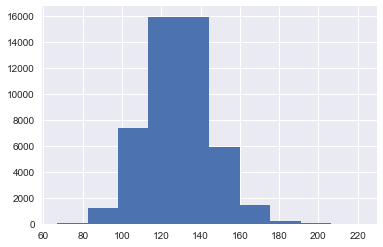

In [4]:
# 檢查 SBP
count_sbp = dict(Counter(df['SBP'].sort_values()))
print(count_sbp)
plt.hist(df['SBP'])

In [5]:
# 將SBP最大值限縮到 200，最小值限縮到 80
df['SBP'] = df['SBP'].mask(df['SBP']>200,200)
df['SBP'] = df['SBP'].mask(df['SBP']<80,80)

{23: 1, 30: 2, 32: 1, 33: 1, 34: 2, 35: 1, 36: 4, 37: 6, 38: 11, 39: 11, 40: 16, 41: 11, 42: 21, 43: 25, 44: 36, 45: 47, 46: 50, 47: 64, 48: 94, 49: 95, 50: 144, 51: 170, 52: 157, 53: 202, 54: 241, 55: 247, 56: 273, 57: 308, 58: 396, 59: 390, 60: 424, 61: 510, 62: 531, 63: 590, 64: 608, 65: 699, 66: 765, 67: 808, 68: 852, 69: 906, 70: 976, 71: 1003, 72: 1006, 73: 1116, 74: 1180, 75: 1281, 76: 1302, 77: 1402, 78: 1389, 79: 1387, 80: 1450, 81: 1449, 82: 1438, 83: 1463, 84: 1533, 85: 1456, 86: 1445, 87: 1422, 88: 1331, 89: 1299, 90: 1221, 91: 1119, 92: 1119, 93: 1044, 94: 897, 95: 817, 96: 720, 97: 649, 98: 633, 99: 526, 100: 468, 101: 400, 102: 415, 103: 318, 104: 258, 105: 212, 106: 212, 107: 172, 108: 140, 109: 112, 110: 107, 111: 92, 112: 67, 113: 43, 114: 50, 115: 44, 116: 22, 117: 25, 118: 19, 119: 17, 120: 13, 121: 8, 122: 10, 123: 5, 124: 6, 125: 8, 126: 2, 127: 4, 128: 2, 129: 2, 130: 4, 131: 2, 132: 2, 133: 1, 134: 3, 135: 1, 137: 1, 139: 1, 151: 1, 167: 1}


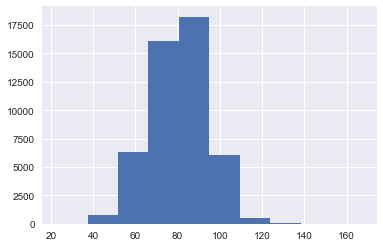

In [6]:
# 檢查 DBP 
count_dbp = dict(Counter(df['DBP'].sort_values()))
print(count_dbp)
plt.hist(df['DBP'])
# 限縮 DBP 最大值 140，最小值 40
df['DBP'] = df['DBP'].mask(df['DBP']>140,140)
df['DBP'] = df['DBP'].mask(df['DBP']<40,40)

{7: 1, 20: 1, 23: 2, 28: 1, 31: 2, 32: 3, 33: 4, 34: 4, 35: 4, 36: 4, 37: 6, 38: 6, 39: 7, 40: 16, 41: 8, 42: 19, 43: 21, 44: 38, 45: 61, 46: 72, 47: 105, 48: 131, 49: 207, 50: 216, 51: 270, 52: 325, 53: 376, 54: 449, 55: 443, 56: 581, 57: 591, 58: 707, 59: 745, 60: 831, 61: 887, 62: 916, 63: 1073, 64: 971, 65: 1121, 66: 1173, 67: 1266, 68: 1241, 69: 1304, 70: 1335, 71: 1316, 72: 1333, 73: 1269, 74: 1413, 75: 1370, 76: 1294, 77: 1388, 78: 1418, 79: 1343, 80: 1236, 81: 1146, 82: 1180, 83: 1194, 84: 999, 85: 1134, 86: 932, 87: 874, 88: 874, 89: 724, 90: 733, 91: 700, 92: 520, 93: 571, 94: 507, 95: 435, 96: 493, 97: 365, 98: 361, 99: 315, 100: 312, 101: 283, 102: 268, 103: 227, 104: 169, 105: 211, 106: 161, 107: 161, 108: 142, 109: 118, 110: 110, 111: 86, 112: 76, 113: 86, 114: 69, 115: 65, 116: 56, 117: 47, 118: 43, 119: 38, 120: 46, 121: 27, 122: 25, 123: 31, 124: 14, 125: 13, 126: 28, 127: 17, 128: 19, 129: 9, 130: 17, 131: 11, 132: 7, 133: 11, 134: 5, 135: 6, 136: 3, 137: 4, 138: 4, 1

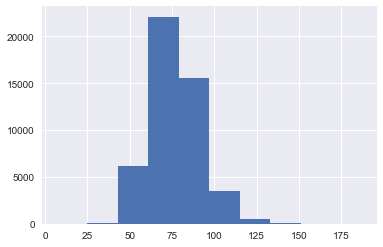

In [7]:
# 檢查 rate
count_rate = dict(Counter(df['RATE'].sort_values()))
print(count_rate)
plt.hist(df['RATE'])
# 限縮 RATE 最大值 135，最小值 40
df['RATE'] = df['RATE'].mask(df['RATE']>135,135)
df['RATE'] = df['RATE'].mask(df['RATE']<40,40)

In [8]:
# 檢查調整過大小值的 df 有沒有成功
df.describe()

,SBP,DBP,RATE,TIME,SLEEPFRO,SLEEPTO
count,48063.000000,48063.000000,48063.000000,48063.000000,48063.000000,48063.000000
mean,128.473504,80.532197,76.322389,11.536234,16.882820,6.148389
std,16.552306,13.181779,14.456063,6.941331,9.354409,1.977484
min,80.000000,40.000000,40.000000,0.000000,0.000000,0.000000
25%,117.000000,72.000000,66.000000,5.000000,10.000000,5.000000
50%,128.000000,81.000000,75.000000,12.000000,22.000000,6.000000
75%,139.000000,89.000000,85.000000,17.000000,23.000000,7.000000
max,200.000000,140.000000,135.000000,23.000000,23.000000,23.000000


### step4
想要將資料框整理成 ID_REL, DIET, mean_sleep_sbp, mean_wake_sbp, mean_sleep_dbp, mean_wake_dbp, mean_sleep_rate, mean_wake_rate, diet,sodium,sleep_CY
1. 先分成六個 df: H_control, M_control, L_control, H_dash, M_dash, L_dash

In [ ]:
control_df = df[df['DIET']=='CONTROL']
dash_df = df[df['DIET']=='COMBINATION']

H_control = control_df[control_df['SODIUM']=='H']
M_control = control_df[control_df['SODIUM']=='M']
L_control = control_df[control_df['SODIUM']=='L']

H_dash = dash_df[dash_df['SODIUM']=='H']
M_dash = dash_df[dash_df['SODIUM']=='M']
L_dash = dash_df[dash_df['SODIUM']=='L']

2. 處理時間欄位，使用 dat 自己寫的套件

In [ ]:
# 之前跑 for loop 會當機，所以一個一個來
# 要注意，這部會跑很久，要重啟 kernel 建議一個一個跑
#dat.add_24(H_control)
#dat.add_24(M_control)
#dat.add_24(L_control)
#dat.add_24(H_dash)
#dat.add_24(M_dash)
#dat.add_24(L_dash)

In [ ]:
# 增加 sleep_awake 欄位，自己寫的 function dat.sleep_awake()
df_list = [H_control, M_control, L_control, H_dash, M_dash, L_dash]
for df in df_list:
    dat.sleep_awake(df)

In [ ]:
# 用自己寫的 fumction 計算，算出平均值 dat.mean_bp_rate()
H_control_mean = dat.mean_bp_rate(H_control)
M_control_mean = dat.mean_bp_rate(M_control)
L_control_mean = dat.mean_bp_rate(L_control)
H_dash_mean = dat.mean_bp_rate(H_dash)
M_dash_mean = dat.mean_bp_rate(M_dash)
L_dash_mean = dat.mean_bp_rate(L_dash)

In [ ]:
# 儲存清理好的 csv 檔案
H_control_mean.to_csv('./Clean_data/H_control_mean.csv')
M_control_mean.to_csv('./Clean_data/M_control_mean.csv')
L_control_mean.to_csv('./Clean_data/L_control_mean.csv')
H_dash_mean.to_csv('./Clean_data/H_dash_mean.csv')
M_dash_mean.to_csv('./Clean_data/M_dash_mean.csv')
L_dash_mean.to_csv('./Clean_data/L_dash_mean.csv')